In [73]:
import torch

from Transformer import Transformer, ModelArgs

import pickle

import numpy as np
import umap
import matplotlib.pyplot as plt

In [74]:
config = {
        'data_dir': 'output',
        'log_dir': 'logs',
        'checkpoint_dir': 'checkpoints',
        'sequence_length': 10,
        'batch_size': 32,
        'learning_rate': 1e-4,
        'num_epochs': 100,
        'device': 'mps',
        'model_dim': 512,  # Match the embedding dimension
        'n_layers': 8,
        'n_heads': 8,
        'train_ratio': 0.7,
        'val_ratio': 0.15
    }

model_args = ModelArgs(
        dim=config['model_dim'],
        n_layers=config['n_layers'],
        n_heads=config['n_heads'],
        max_batch_size=config['batch_size'],
        max_seq_len=config['sequence_length'],
        device=config['device']
    )

model = Transformer(model_args).to(config['device'])

#load checkpoint
checkpoint = torch.load('checkpoints/best_model.pt')

model.load_state_dict(checkpoint['model_state_dict'])


/var/folders/5f/vlrq37bj7cg58p99qhr_npcc0000gn/T/ipykernel_44617/4188246723.py:29: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load('checkpoints/best_mo

<All keys matched successfully>

In [72]:
data = pickle.load(open('output/jackal/Epat30/embeddings_Epat30_W60_S30_train.pkl', "rb"))
print(data.keys())
print(data['patient_embeddings'].shape)
print(data['original_shape'])
print(len(data["start_times"]))
print(len(data["start_times"]))
print(len(data["window_indices"]))
print(data["seizure_labels"])
for i in range(1, 760):
    print(data["start_times"][i]-data["start_times"][i-1])



dict_keys(['patient_id', 'patient_embeddings', 'start_times', 'stop_times', 'file_indices', 'window_indices', 'original_shape', 'sleep_labels', 'seizure_labels'])
(760, 32, 512)
(760, 32, 512)
760
760
760
None
0 days 00:14:56
0 days 00:14:56
0 days 00:14:56
0 days 00:14:56
0 days 00:14:56
0 days 00:14:56
0 days 00:14:56
0 days 00:14:56
0 days 00:14:56
0 days 00:14:56
0 days 00:14:56
0 days 00:14:56
0 days 00:14:56
0 days 00:14:56
0 days 00:14:56
0 days 00:14:56
0 days 00:14:56
0 days 00:14:56
0 days 00:14:56
0 days 00:14:56
0 days 00:14:56
0 days 00:14:56
0 days 00:14:56
0 days 00:14:56
0 days 00:14:56
0 days 00:14:56
0 days 00:14:56
0 days 00:14:56
0 days 00:14:56
0 days 00:14:56
0 days 00:14:56
0 days 00:14:56
0 days 00:14:56
0 days 00:14:56
0 days 00:14:56
0 days 00:14:56
0 days 00:14:56
0 days 00:14:56
0 days 00:14:56
0 days 00:14:56
0 days 00:14:56
0 days 00:14:56
0 days 00:14:56
0 days 00:14:56
0 days 00:14:56
0 days 00:14:56
0 days 00:14:56
0 days 00:14:56
0 days 00:14:56
0 days

Combined data shape: (24320, 512)


/Users/davidzaha/miniconda3/envs/brainhacks25_env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/davidzaha/miniconda3/envs/brainhacks25_env/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/var/folders/5f/vlrq37bj7cg58p99qhr_npcc0000gn/T/ipykernel_44617/3846095151.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding[:, 0], embedding[:, 1], s=2, cmap='Spectral', alpha=0.6)


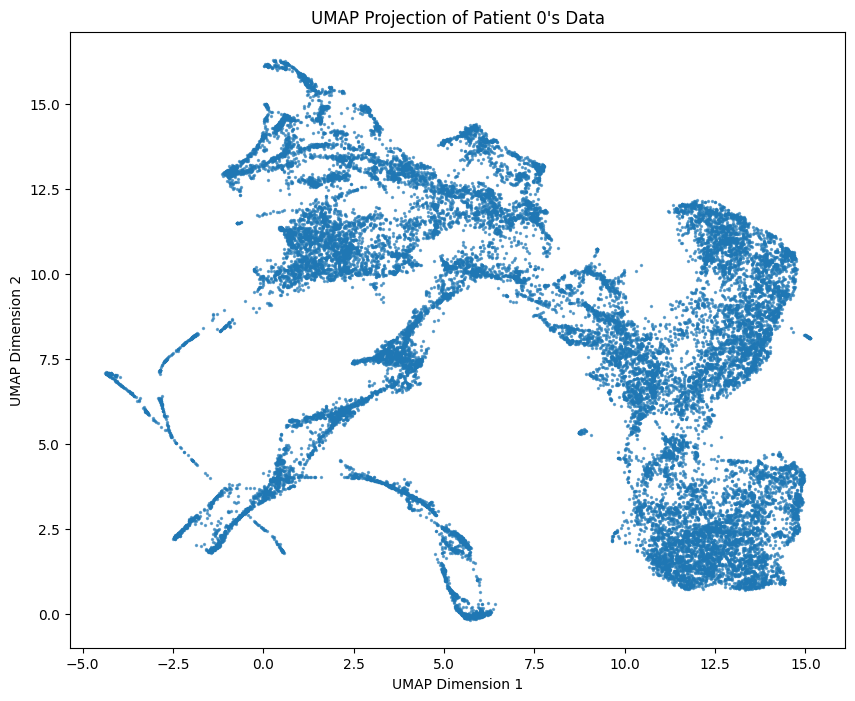

In [75]:

combined_data = np.reshape(data['patient_embeddings'], (-1, data['patient_embeddings'].shape[-1]))
print(f"Combined data shape: {combined_data.shape}")  # Should be (40600, 1024)

# Step 2: Apply UMAP
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
embedding = reducer.fit_transform(combined_data)

# Step 3: Plot the UMAP
plt.figure(figsize=(10, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], s=2, cmap='Spectral', alpha=0.6)
plt.title("UMAP Projection of Patient 0's Data")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.show()

torch.Size([760, 32, 512])
torch.Size([32, 10, 512])


/Users/davidzaha/miniconda3/envs/brainhacks25_env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/davidzaha/miniconda3/envs/brainhacks25_env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/var/folders/5f/vlrq37bj7cg58p99qhr_npcc0000gn/T/ipykernel_44617/3730447193.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding[:, 0], embedding[:, 1], s=2, cmap='Spectral', alpha=0.6)


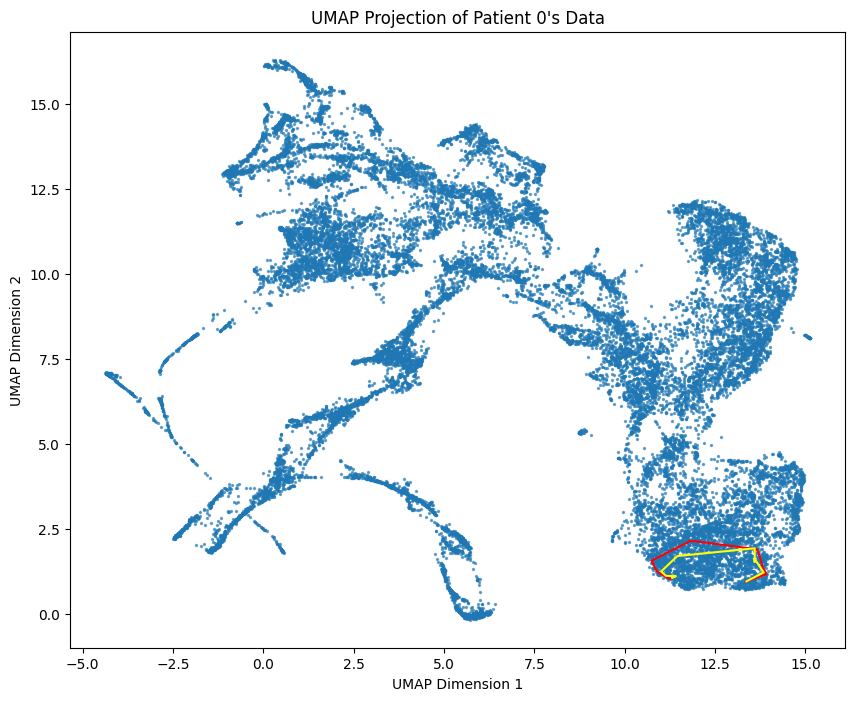

[[-0.0783065  -0.06696139 -0.25461924 ... -0.68108004  0.10129612
  -0.14387277]
 [-0.08100344 -0.06466725 -0.25505883 ... -0.67901266  0.10026766
  -0.14231662]
 [-0.08055059 -0.0662285  -0.25458202 ... -0.67856544  0.10336059
  -0.14258704]
 ...
 [-0.07655616 -0.06581338 -0.2536654  ... -0.6867662   0.1087055
  -0.14340696]
 [-0.07841328 -0.06646448 -0.25318238 ... -0.6854807   0.10696248
  -0.1415871 ]
 [-0.07919066 -0.06901886 -0.25283295 ... -0.6851384   0.10626576
  -0.14112674]]


In [78]:
data_tensor = torch.from_numpy(data['patient_embeddings']).to(torch.float32).to(config['device'])
print(data_tensor.shape)
model.eval()
i=20
input_tensor = data_tensor.view(-1, 10, 512)[i*config["batch_size"]:(i+1)*config["batch_size"], :, :]
output = model(input_tensor)
print(output.shape)

#ground truth
gt_embedding = reducer.transform(input_tensor[0].detach().cpu().numpy())

# plot the trajectory of the predicted output on the umap
output = output[0].detach().cpu().numpy()
output_embedding = reducer.transform(output)

plt.figure(figsize=(10, 8))

plt.scatter(embedding[:, 0], embedding[:, 1], s=2, cmap='Spectral', alpha=0.6)
plt.plot(gt_embedding[:, 0], gt_embedding[:, 1], color="red")
plt.plot(output_embedding[:, 0], output_embedding[:, 1], color="yellow")

plt.title("UMAP Projection of Patient 0's Data")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.show()

print(output)